In [54]:
import numpy as np
import pandas as pd
import re
import math
df = pd.read_csv("hawkeye_results.csv")

In [55]:
df.head()

,Unnamed: 0,#,Прізвище,Ім’я,Старт,КП1,КП2,КП3,КП4,КП5,КП6,КП7,КП8,КП9,КП10,фініш,MO,WO
0,1,43,Popov,Serhii,12:00,13:11,13:37,14:12,15:00,15:45,+,16:46,+,18:00,+,6:21:57,1,NaN
1,2,33,Ткачук,Андрій,12:00,13:15,13:45,14:19,15:10,15:55,+,16:53,+,18:23,+,6:40:42,2,NaN
2,3,109,Борисенко,Олексій,12:00,13:15,13:43,14:18,15:10,15:55,+,16:53,+,18:27,+,6:48:53,3,NaN
3,4,67,Щукін,Костянтин,12:00,13:20,13:50,14:28,15:24,16:13,+,19:02,+,18:36,+,6:57:16,4,NaN
4,5,115,Kartavyi,Volodymyr,12:00,13:58,13:49,14:26,15:27,16:18,+,17:24,+,18:39,+,7:00:08,5,NaN


How many man?

In [56]:
df['WO'].count()

22

How many women?

In [57]:
df['MO'].count()

87

Did Not Finish

In [58]:
len(df[df['фініш'] == 'DNF'].index)

6

In [59]:
df = df[df['КП1'].str.match("\d*:\d*")]

In [60]:
df.head()

,Unnamed: 0,#,Прізвище,Ім’я,Старт,КП1,КП2,КП3,КП4,КП5,КП6,КП7,КП8,КП9,КП10,фініш,MO,WO
0,1,43,Popov,Serhii,12:00,13:11,13:37,14:12,15:00,15:45,+,16:46,+,18:00,+,6:21:57,1,NaN
1,2,33,Ткачук,Андрій,12:00,13:15,13:45,14:19,15:10,15:55,+,16:53,+,18:23,+,6:40:42,2,NaN
2,3,109,Борисенко,Олексій,12:00,13:15,13:43,14:18,15:10,15:55,+,16:53,+,18:27,+,6:48:53,3,NaN
3,4,67,Щукін,Костянтин,12:00,13:20,13:50,14:28,15:24,16:13,+,19:02,+,18:36,+,6:57:16,4,NaN
4,5,115,Kartavyi,Volodymyr,12:00,13:58,13:49,14:26,15:27,16:18,+,17:24,+,18:39,+,7:00:08,5,NaN


In [61]:
for c in ['КП1','КП2','КП3','КП4','КП5','КП7','КП9']:
    df = df[df[c].notnull()]
    df = df[df[c].str.match(r'\d*:\d*')]
    df[c] = df[c].str.split(':').apply(lambda x: (int(x[0])-12) * 60 + int(x[1])).apply(lambda x: x if x>0 else x + 24*60)

In [62]:
df['фініш']=df['фініш'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [63]:
time_features = ['КП1','КП2','КП3','КП4','КП5','КП7','КП9', 'фініш']

In [64]:
dft = df[time_features]

In [65]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

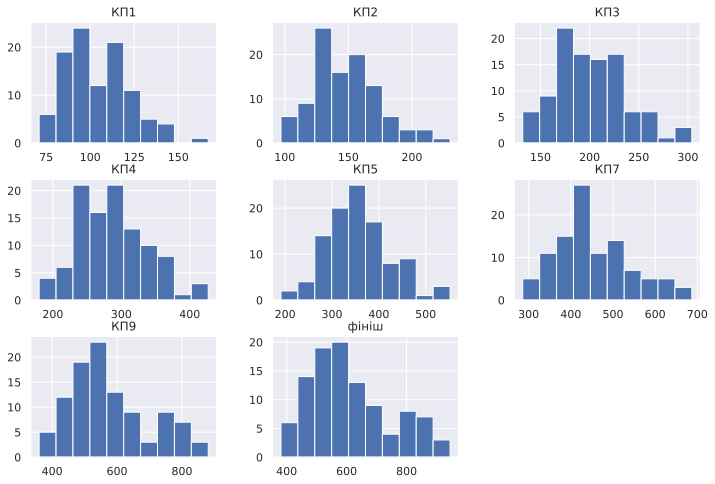

In [66]:
dft.hist(figsize=(12, 8));

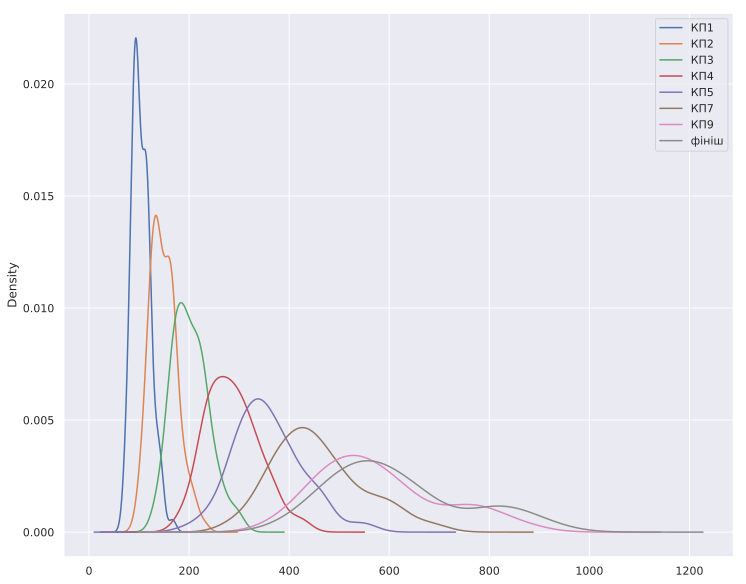

In [67]:
dft.plot(kind='density', subplots=False, 
                  sharex=False, figsize=(12, 10));

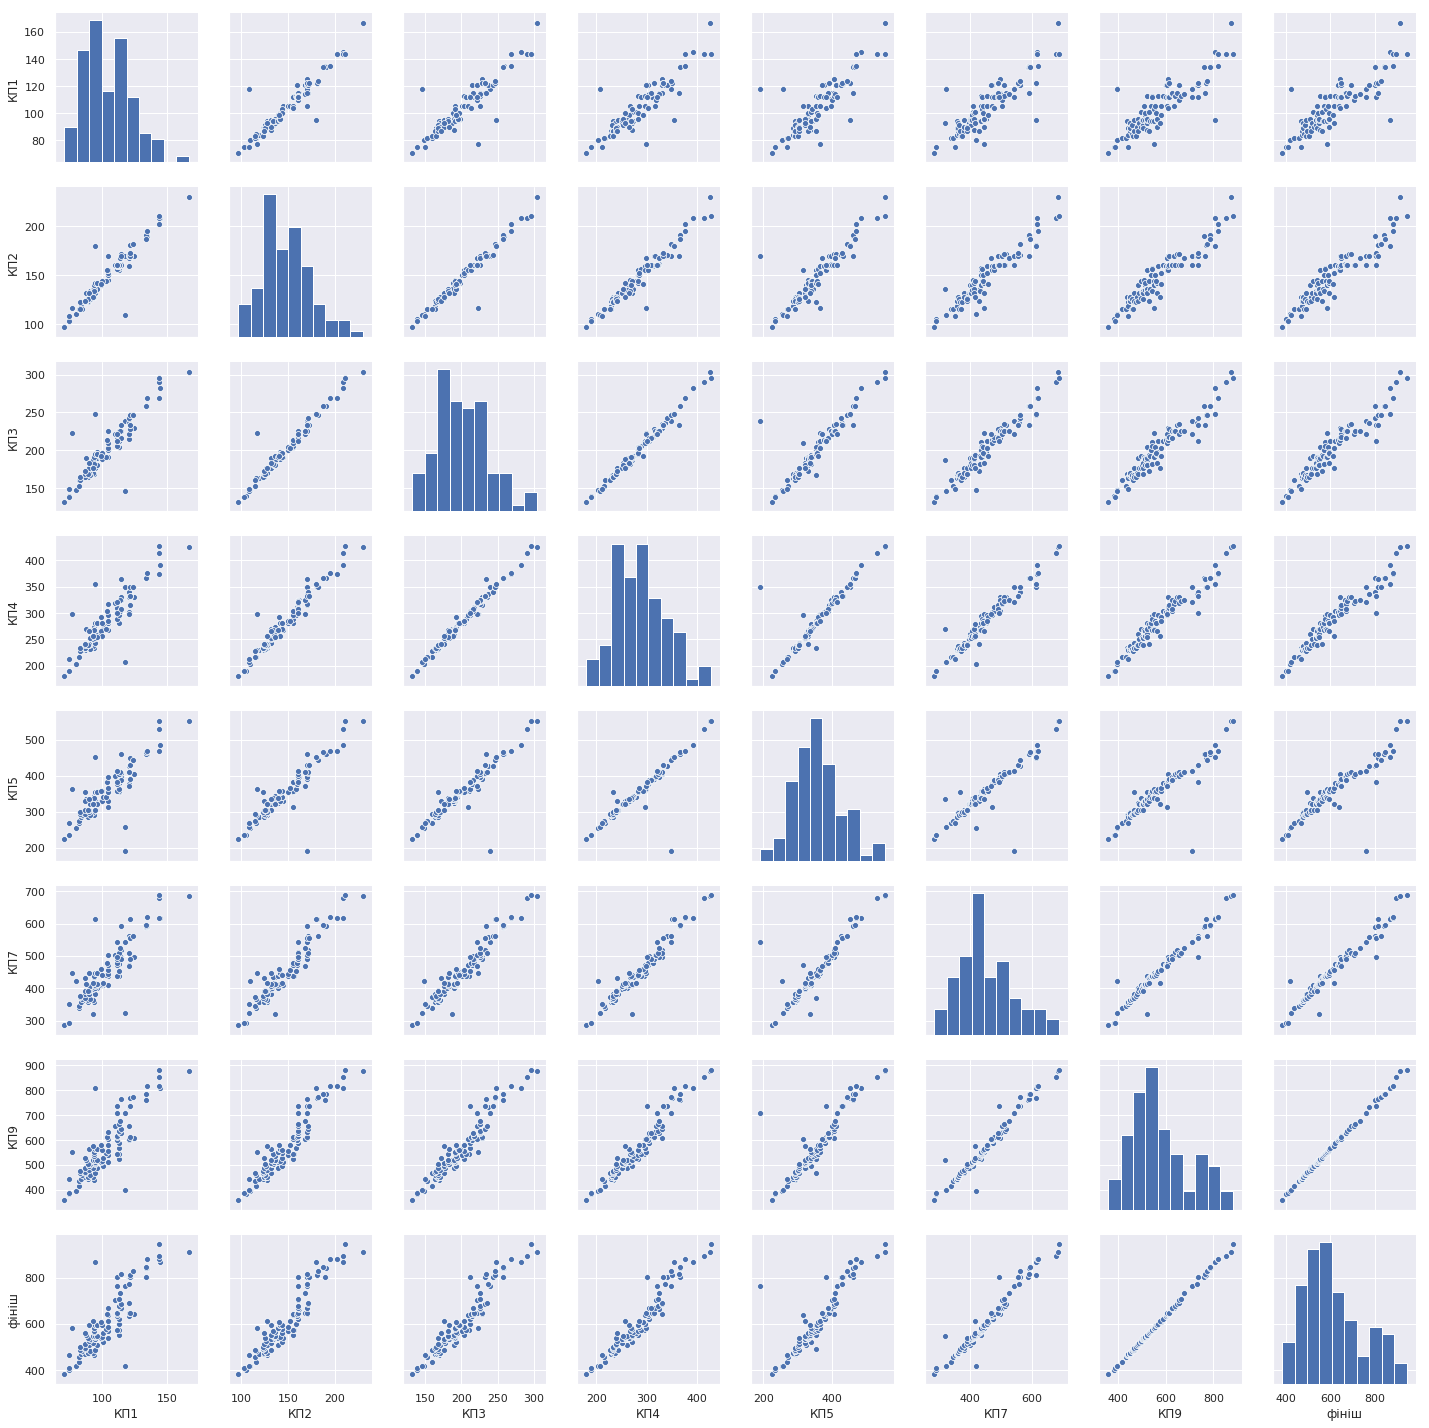

In [68]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(dft);

In [69]:
dist = [12.1, 15.5, 21.8, 30, 35.6,42.5,51.8,54.5]

In [70]:
for i,feature in enumerate(time_features[1:]):
    df['interval ' + str(i)] = df[feature] - df[time_features[i]]

In [76]:
intervals = ['interval 0','interval 1','interval 2','interval 3','interval 4','interval 5','interval 6']

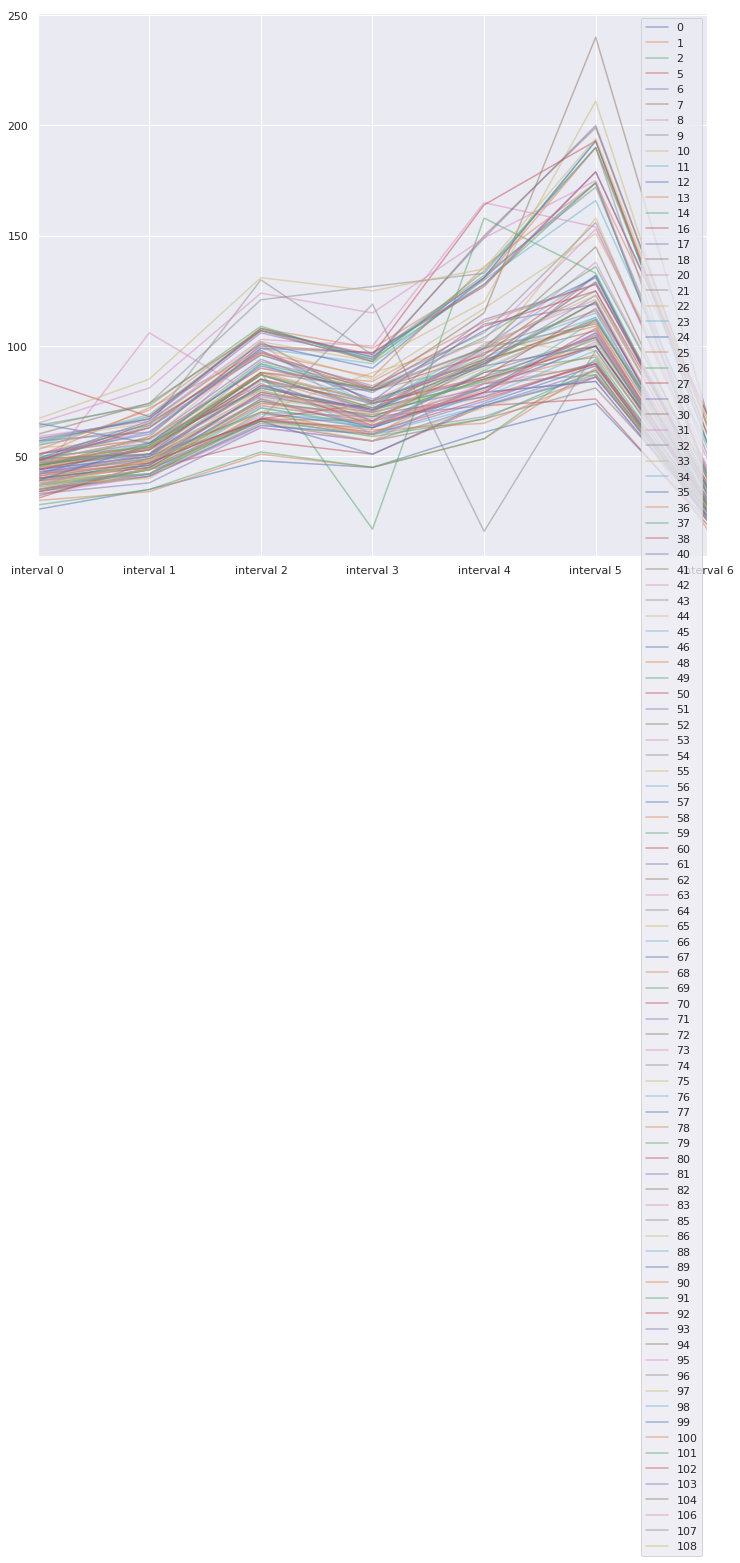

In [79]:
df[intervals].T.plot(figsize=(12, 10), alpha=0.5)

In [78]:
import operator, functools
positive_pace = df[intervals].apply(lambda row: functools.reduce(lambda a,b: a and b, [x > 0 for x in row], 1), axis=1)

In [75]:
df = df[positive_pace]

In [53]:
df.head()

AttributeError: 'tuple' object has no attribute 'head'